# Weather Py Analysis/Observable Trends

• Not surprisingly, temperature increases as one approaches the equator and vice versa (especially in the Northern Hemisphere with the "Max Temp vs. Latitude" R sq. correlation being -84.6%). However, the largest clusters of cities are at positive and negative 20 degrees latitude, not exactly at the equatorial line. 
• Cloudiness and humidity do not show a strong correlation to latitude. The visualizations below show a great variety of values at similar latitudes.
• Latitude does not seem to play a factor in wind speeds. Wind speed appears to slightly increase as we move away from the equator, but overall are clustered this time of year at less than 10 mph. 

In [29]:
 # Dependencies
import csv
import requests as req
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from scipy import stats as sp
import json
import seaborn
from citipy import citipy
import time
import random

In [30]:
api_key = "72288c380fa52e7f1ff3350997574175"
endpoint = "http://api.openweathermap.org/data/2.5/weather"
units = "Imperial"

# Generate Cities List¶

In [31]:
#Creates 2 lists of latitudes and longitutdes randomly
#Zips into a single dictionary

lats = []
lngs = []
for x in range(500):
    lats.append(random.randrange(-90,90))
    lngs.append(random.randrange(-180,180))
locs = dict(zip(lats,lngs))
#print(len(lats), len(lngs))
type(locs)

dict

In [32]:
# Making an empty list to hold the randomly selected cities
prelim_city_list = []

# Generating 1000 unique cities using randomly generated coordinates
while len(prelim_city_list) < 1000:
    city = citipy.nearest_city(random.randrange(-90,90), random.randrange(-180,180)).city_name
    
    # Ensuring uniqueness in the city list
    if city not in prelim_city_list:
        prelim_city_list.append(city)

In [33]:
# Checking number of cities
n_cities = len(prelim_city_list)
print(n_cities)

1000


In [34]:
#Creates 2 lists of latitudes and longitutdes randomly
#Zips into a single dictionary

lat = np.random.choice(range(-90,90),2000)
lng = np.random.choice(range(-180,180),2000)
      
locs = dict(zip(lats,lngs))
#print(len(lats), len(lngs))
type(locs)

#Random selection of latitude and longitude 

lat_lng = pd.DataFrame({"Lat":lat,"Long":lng})        

#print(len(lat_lng)
lat_lng.head()

,Lat,Long
0,-17,174
1,-39,-116
2,48,-89
3,73,99
4,84,104


In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [16]:
#Uses Citipy to identify the nearest city with country code

locs_conv = []
weatherdata_df = pd.DataFrame(columns = ['City','Temp','Humidity','Clouds','Wind_Speed'])
response_data = []

for key,value in locs.items():
    city = citipy.nearest_city(key,value)
    locs_conv.append(city)

#locs_conv
city_counter = 0
print('Beginning Data Retrieval')
print('-----------------------------')
for location in locs_conv:
    print('Processing record '+str(city_counter)+' of '+ str(len(locs_conv))+"|"+location.city_name)
    city_counter +=1
    
    try:
        params = {
            'appid': api_key,
            'units': units,
            'q': location.city_name+","+location.country_code
        }
                     
        #print('Getting Data for #'+str(city_counter))
        
        response = req.get(endpoint, params=params).json()
        response_data.append(response)
        target_url = "http://api.openweathermap.org/data/2.5/weather?units=%s&APPID=%s&q=%s" % (params['units'],api_key,location.city_name.strip())
        
        
    except:
        continue
    
    print(target_url)
    time.sleep(1)

    
#creates a dataframe to store the responses and then save it to a csv    
response_df = pd.DataFrame(response_data)
response_df.to_csv('saved_data.csv')  



print('Data Retrieval Complete')        

Beginning Data Retrieval
-----------------------------
Processing record 0 of 168|cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=cape town
Processing record 1 of 168|rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=rikitea
Processing record 2 of 168|saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=saldanha
Processing record 3 of 168|jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=jamestown
Processing record 4 of 168|pospelikha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=pospelikha
Processing record 5 of 168|baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=baykit
Processing record 6 of 168|nome
http://api.openweatherm

Processing record 55 of 168|ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=ushuaia
Processing record 56 of 168|albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=albany
Processing record 57 of 168|hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=hasaki
Processing record 58 of 168|dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=dikson
Processing record 59 of 168|bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=bluff
Processing record 60 of 168|havoysund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=havoysund
Processing record 61 of 168|arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa5

Processing record 110 of 168|albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=albany
Processing record 111 of 168|itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=itarema
Processing record 112 of 168|cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=cidreira
Processing record 113 of 168|rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=rikitea
Processing record 114 of 168|puri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=puri
Processing record 115 of 168|blytheville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=blytheville
Processing record 116 of 168|atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c

Processing record 165 of 168|punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=punta arenas
Processing record 166 of 168|kalyazin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=kalyazin
Processing record 167 of 168|cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72288c380fa52e7f1ff3350997574175&q=cape town
Data Retrieval Complete


In [17]:
response_df = response_df.dropna(thresh = 3)
response_df

,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,id,name,cod,rain,message
0,"{'lon': 18.42, 'lat': -33.93}","[{'id': 801, 'main': 'Clouds', 'description': ...",stations,"{'temp': 58.75, 'feels_like': 56.34, 'temp_min...",10000.0,"{'speed': 8.05, 'deg': 330}",{'all': 20},1.603770e+09,"{'type': 1, 'id': 1899, 'country': 'ZA', 'sunr...",7200.0,3369157.0,Cape Town,200,NaN,NaN
1,"{'lon': -134.97, 'lat': -23.12}","[{'id': 500, 'main': 'Rain', 'description': 'l...",stations,"{'temp': 75.54, 'feels_like': 75.22, 'temp_min...",10000.0,"{'speed': 15.08, 'deg': 352}",{'all': 100},1.603771e+09,"{'country': 'PF', 'sunrise': 1603721868, 'suns...",-32400.0,4030556.0,Rikitea,200,{'1h': 0.18},NaN
2,"{'lon': 17.94, 'lat': -33.01}","[{'id': 802, 'main': 'Clouds', 'description': ...",stations,"{'temp': 59, 'feels_like': 56.7, 'temp_min': 5...",9975.0,"{'speed': 6.93, 'deg': 350}",{'all': 29},1.603771e+09,"{'type': 1, 'id': 1943, 'country': 'ZA', 'sunr...",7200.0,3361934.0,Saldanha,200,NaN,NaN
3,"{'lon': -5.72, 'lat': -15.94}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 61.03, 'feels_like': 54.09, 'temp_min...",10000.0,"{'speed': 18.25, 'deg': 127}",{'all': 97},1.603771e+09,"{'country': 'SH', 'sunrise': 1603777680, 'suns...",0.0,3370903.0,Jamestown,200,NaN,NaN
4,"{'lon': 81.77, 'lat': 51.95}","[{'id': 803, 'main': 'Clouds', 'description': ...",stations,"{'temp': 50.34, 'feels_like': 31.46, 'temp_min...",10000.0,"{'speed': 26.51, 'deg': 196}",{'all': 76},1.603771e+09,"{'country': 'RU', 'sunrise': 1603761523, 'suns...",25200.0,1494331.0,Pospelikha,200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,"{'lon': 172.79, 'lat': 3.07}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': 81.7, 'feels_like': 84.18, 'temp_min'...",10000.0,"{'speed': 8.05, 'deg': 120}",{'all': 6},1.603771e+09,"{'country': 'KI', 'sunrise': 1603735919, 'suns...",43200.0,2110227.0,Butaritari,200,NaN,NaN
162,"{'lon': 96.13, 'lat': 4.14}","[{'id': 803, 'main': 'Clouds', 'description': ...",stations,"{'temp': 85.35, 'feels_like': 92.35, 'temp_min...",10000.0,"{'speed': 2.75, 'deg': 165}",{'all': 53},1.603771e+09,"{'country': 'ID', 'sunrise': 1603754376, 'suns...",25200.0,1214488.0,Meulaboh,200,NaN,NaN
165,"{'lon': -70.92, 'lat': -53.15}","[{'id': 801, 'main': 'Clouds', 'description': ...",stations,"{'temp': 41, 'feels_like': 25.7, 'temp_min': 4...",10000.0,"{'speed': 20.8, 'deg': 310}",{'all': 20},1.603771e+09,"{'type': 1, 'id': 8487, 'country': 'CL', 'sunr...",-10800.0,3874787.0,Punta Arenas,200,NaN,NaN
166,"{'lon': 37.84, 'lat': 57.24}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 41.47, 'feels_like': 32.81, 'temp_min...",10000.0,"{'speed': 10.65, 'deg': 175}",{'all': 98},1.603771e+09,"{'country': 'RU', 'sunrise': 1603772943, 'suns...",10800.0,553884.0,Kalyazin,200,NaN,NaN


# Convert Raw Data to DataFrame¶¶
Export the city data into a .csv. Display the DataFrame

In [36]:
#creates a new list that removes the errors from the response_data list
clean_rd = [s for s in response_data if s['cod']!='404' ]

#builds the lists of data using the clean_rd 
temp_data = [response['main']['temp'] for response in clean_rd]
loc_data = [response['name'] for response in clean_rd]
humid_data = [response['main']['humidity'] for response in clean_rd]
cloud_data = [response['clouds']['all'] for response in clean_rd]
wind_data = [response['wind']['speed'] for response in clean_rd]
country_data = [response['sys']['country'] for response in clean_rd]
date_data = [response['dt'] for response in clean_rd]
lat_data = [response['coord']['lat'] for response in clean_rd]
lon_data = [response['coord']['lon'] for response in clean_rd]
max_temp_data = [response['main']['temp_max'] for response in clean_rd]
#print(loc_data)
#print(clean_rd[0])

#fills the selected data into the weatherdata_df dataframe
weatherdata_df['Wind_Speed']=wind_data
weatherdata_df['Clouds']=cloud_data
weatherdata_df['Humidity']=humid_data
weatherdata_df['Temp']=temp_data
weatherdata_df['City']=loc_data
weatherdata_df['Country'] = country_data
weatherdata_df['Date'] = date_data
weatherdata_df['Lat'] = lat_data
weatherdata_df['Lng'] = lon_data
weatherdata_df['Max Temp'] = max_temp_data

#reorders the dataframe to match the example
weatherdata_df = weatherdata_df[['City','Clouds','Country','Date','Humidity','Lat','Lng','Max Temp','Wind_Speed']]
weatherdata_df.head()

,City,Clouds,Country,Date,Humidity,Lat,Lng,Max Temp,Wind_Speed
0,Cape Town,20,ZA,1603770468,93,-33.93,18.42,61.00,8.05
1,Rikitea,100,PF,1603770757,86,-23.12,-134.97,75.54,15.08
2,Saldanha,29,ZA,1603770758,87,-33.01,17.94,59.00,6.93
3,Jamestown,97,SH,1603770759,97,-15.94,-5.72,61.03,18.25
4,Pospelikha,76,RU,1603770760,44,51.95,81.77,50.34,26.51


In [19]:
clean_df = pd.DataFrame(clean_rd)
clean_df.head()

,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,id,name,cod,rain
0,"{'lon': 18.42, 'lat': -33.93}","[{'id': 801, 'main': 'Clouds', 'description': ...",stations,"{'temp': 58.75, 'feels_like': 56.34, 'temp_min...",10000,"{'speed': 8.05, 'deg': 330}",{'all': 20},1603770468,"{'type': 1, 'id': 1899, 'country': 'ZA', 'sunr...",7200,3369157,Cape Town,200,NaN
1,"{'lon': -134.97, 'lat': -23.12}","[{'id': 500, 'main': 'Rain', 'description': 'l...",stations,"{'temp': 75.54, 'feels_like': 75.22, 'temp_min...",10000,"{'speed': 15.08, 'deg': 352}",{'all': 100},1603770757,"{'country': 'PF', 'sunrise': 1603721868, 'suns...",-32400,4030556,Rikitea,200,{'1h': 0.18}
2,"{'lon': 17.94, 'lat': -33.01}","[{'id': 802, 'main': 'Clouds', 'description': ...",stations,"{'temp': 59, 'feels_like': 56.7, 'temp_min': 5...",9975,"{'speed': 6.93, 'deg': 350}",{'all': 29},1603770758,"{'type': 1, 'id': 1943, 'country': 'ZA', 'sunr...",7200,3361934,Saldanha,200,NaN
3,"{'lon': -5.72, 'lat': -15.94}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 61.03, 'feels_like': 54.09, 'temp_min...",10000,"{'speed': 18.25, 'deg': 127}",{'all': 97},1603770759,"{'country': 'SH', 'sunrise': 1603777680, 'suns...",0,3370903,Jamestown,200,NaN
4,"{'lon': 81.77, 'lat': 51.95}","[{'id': 803, 'main': 'Clouds', 'description': ...",stations,"{'temp': 50.34, 'feels_like': 31.46, 'temp_min...",10000,"{'speed': 26.51, 'deg': 196}",{'all': 76},1603770760,"{'country': 'RU', 'sunrise': 1603761523, 'suns...",25200,1494331,Pospelikha,200,NaN


In [44]:
#creates dataframes for each plot for the sake of clean data management
temps_df = pd.DataFrame(columns = ['Temps','Lats'])
humid_df = pd.DataFrame(columns = ['Humidity','Lats'])
cloud_df = pd.DataFrame(columns = ['Cloudiness','Lats'])
wind_df = pd.DataFrame(columns = ['Wind_Speed','Lats'])

lat_data = [response['coord']['lat'] for response in clean_rd]

#fills in the latitude data values
wind_df['Lats'] = lat_data
cloud_df['Lats'] = lat_data
humid_df['Lats'] = lat_data
temps_df['Lats'] = lat_data

#fills in the requested value for each 
wind_df['Wind_Speed'] = weatherdata_df['Wind_Speed']
cloud_df['Cloudiness'] = weatherdata_df['Clouds']
humid_df['Humidity'] = weatherdata_df['Humidity']
temps_df['Temps'] = weatherdata_df['Max Temp']

# Latitude vs. Temperature Plot¶

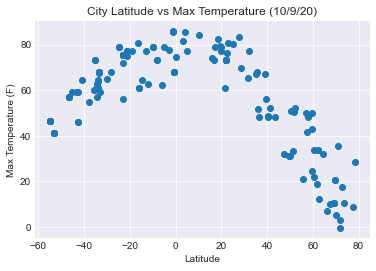

In [21]:
#creates and styles the temperature vs latitude plot

temp_plot = plt.scatter(temps_df['Lats'],temps_df['Temps'])
plt.title('City Latitude vs Max Temperature (10/9/20)')
plt.style.use('seaborn-dark')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Lat_Temp.png')
plt.show()

# Latitude vs. Humidity Plot

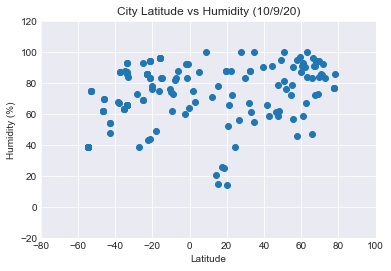

In [36]:
#creates and styles the humidity vs latitude plot

humid_plot = plt.scatter(humid_df['Lats'],humid_df['Humidity'])
plt.title('City Latitude vs Humidity (10/9/20)')
plt.style.use('seaborn-dark')
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Lat_Humid.png')
plt.show()

# Latitude vs. Cloudiness Plot

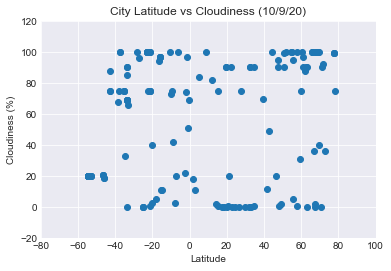

In [37]:
#creates and styles the cloudiness vs latitude plot

cloud_plot = plt.scatter(cloud_df['Lats'],cloud_df['Cloudiness'])
plt.title('City Latitude vs Cloudiness (10/9/20)')
plt.style.use('seaborn-dark')
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Lat_Cloud.png')
plt.show()

# Latitude vs. Wind Speed Plot

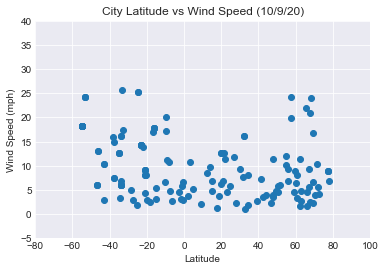

In [38]:
#creates and styles the wind speed vs latitude plot

wind_plot = plt.scatter(wind_df['Lats'],wind_df['Wind_Speed'])
plt.title('City Latitude vs Wind Speed (10/9/20)')
plt.style.use('seaborn-dark')
plt.xlim(-80,100)
plt.ylim(-5,40)
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Lat_Wind.png')
plt.show()

# Linear Regression¶¶¶

In [45]:
#Create a function to create Linear Regression plots

def linear_regression(x, y, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = sp.linregress(x,y)
    line = slope*x+intercept
    plt.scatter(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.plot(x,line,"-", color='r',linewidth=3)
    #plt.annotate(line,(x,y),fontsize=15,color="red")
    
    if slope < 0:
        print(f"R-Squared Value: -{r_value**2}")
    else:
        print(f"R-Squared Value: {r_value**2}")

In [46]:
# Create Northern and Southern Hemisphere DataFrames

northern_df = weatherdata_df.loc[weatherdata_df['Lat']>0]
southern_df = weatherdata_df.loc[weatherdata_df['Lat']<0]

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression¶¶

R-Squared Value: -0.8462913357857402


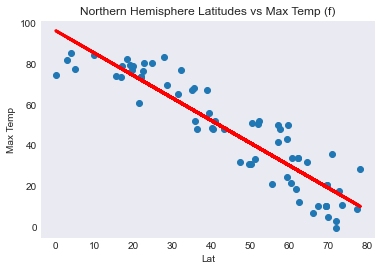

In [47]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression 
linear_regression(northern_df['Lat'],northern_df['Max Temp'],"Lat","Max Temp", "Northern Hemisphere Latitudes vs Max Temp (f)")

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression¶

R-Squared Value: 0.6229008142555034


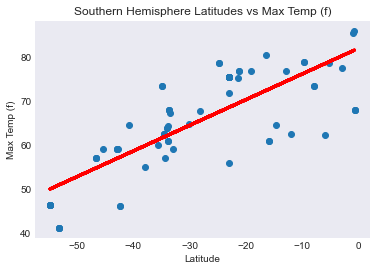

In [48]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
linear_regression(southern_df['Lat'],southern_df['Max Temp'],"Latitude","Max Temp (f)", "Southern Hemisphere Latitudes vs Max Temp (f)")

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression¶

R-Squared Value: 0.06349921462399312


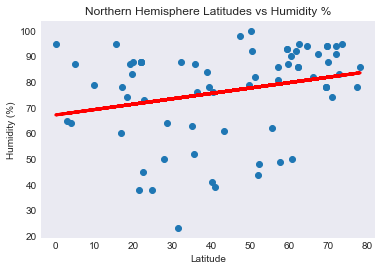

In [49]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
linear_regression(northern_df['Lat'],northern_df['Humidity'],"Latitude","Humidity (%)", "Northern Hemisphere Latitudes vs Humidity %")

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression¶

R-Squared Value: 0.2045604791569123


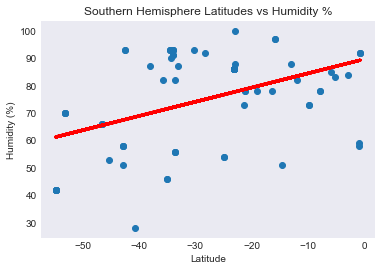

In [53]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
linear_regression(southern_df['Lat'],southern_df['Humidity'],"Latitude","Humidity (%)", "Southern Hemisphere Latitudes vs Humidity %")

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Squared Value: 0.03610276866640308


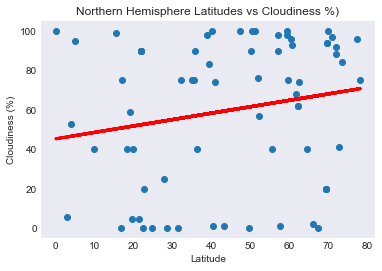

In [54]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
linear_regression(northern_df['Lat'],northern_df['Clouds'],"Latitude","Cloudiness (%)", "Northern Hemisphere Latitudes vs Cloudiness %)")

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression¶¶

R-Squared Value: 0.06690486274988014


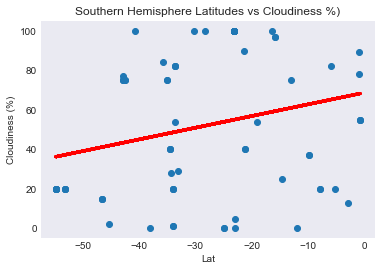

In [55]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
linear_regression(southern_df['Lat'],southern_df['Clouds'],"Lat","Cloudiness (%)", "Southern Hemisphere Latitudes vs Cloudiness %)")

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression¶


R-Squared Value: 0.013550530892987203


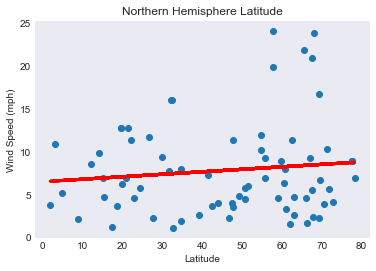

In [72]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
linear_regression(northern_df['Lat'],northern_df['Wind_Speed'],"Latitude","Wind Speed (mph)", "Northern Hemisphere Latitudes vs. Wind Speed")

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Squared Value: -0.017829639684201103


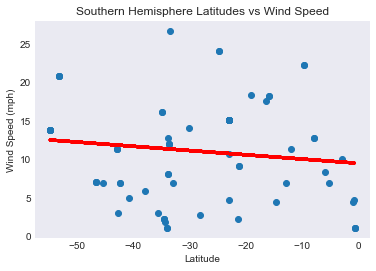

In [56]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
linear_regression(southern_df['Lat'],southern_df['Wind_Speed'],"Latitude","Wind Speed (mph)", "Southern Hemisphere Latitudes vs Wind Speed")